# Data Scientist  Survey: Asian VS European

### Business Understanding

For this project I have used [Stack Overflow data from 2017](https://www.kaggle.com/stackoverflow/so-survey-2017/data) and I will try to find out the below observations:

* Salary comparison between Asian and European.
* Salary comparison with respect to education level.
* Finally find out salary growth with respect to job experience.

### Data Understanding

* First of all we we import all of necessary libraries.
* We read the data as it will be a general view with necessary information.


In [401]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [402]:
'''
Parameters:
    df: a dataframe
'''

df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

#### Here we find out the graphical view of Education Status.

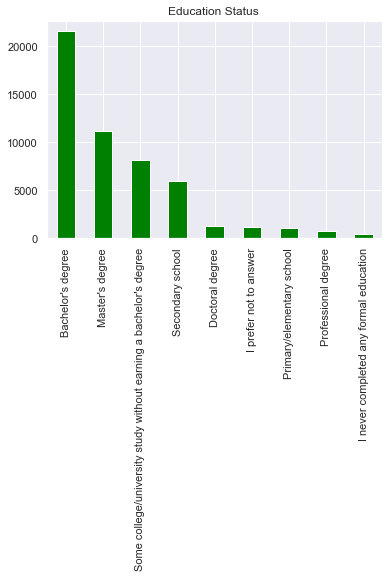

In [403]:
sns.set(font_scale=1)
df['FormalEducation'].value_counts().plot(kind='bar',color = 'green' );
plt.title("Education Status ");

#### From the whole data we select just our necessary columns so that data handle will be more suitable for us.


In [404]:
# Select Useful columns for find out result
columns = ['Country', 'YearsCodedJob', 'FormalEducation', 'Salary']
pd.DataFrame(df.query("Professional == 'Professional developer' and EmploymentStatus == 'Employed full-time'"))[columns]
data = data[columns]

data.head()


,Country,YearsCodedJob,FormalEducation,Salary
0,United Kingdom,20,Bachelor's degree,113750.0
1,Switzerland,10,Master's degree,NaN
2,Poland,7,Master's degree,NaN
3,Colombia,7,Bachelor's degree,NaN
4,Canada,8,Bachelor's degree,NaN


### Data preparation
#### From all countries we are just taken Asian and European countries in two categories. Now we work with our finding into these.

In [405]:
'''
Seperate as two regions

'''



Asia = ['China', 'India','Indonesia', 'Pakistan','Bangladesh','Japan', 'Philippines', 'Vietnam','Turkey', 'Thailand',
        'South Korea', 'Malaysia','North Korea', 'Sri Lanka', 'United Arab Emirates', 'Nepal', 'Yemen','Jordan']

Europe = ['Albania', 'Austria','Belgium', 'Bulgaria','Denmark','Estonia', 'Finland', 'France','Germany', 'Greece', 'Iceland', 
          'Ireland','Italy', 'Liechtenstein', 'Netherlands', 'Norway', 'Poland','Portugal' 'Russia', 'Spain', 'Sweden', 'Switzerland','Ukraine','United Kingdom']

  
# Seperating Asisn and European

data['Location'] = data['Country'].apply(lambda x: 'Asia' if x in Asia else ('Europe' if x in Europe else 'Other'))
data.head()


,Country,YearsCodedJob,FormalEducation,Salary,Location
0,United Kingdom,20,Bachelor's degree,113750.0,Europe
1,Switzerland,10,Master's degree,NaN,Europe
2,Poland,7,Master's degree,NaN,Europe
3,Colombia,7,Bachelor's degree,NaN,Other
4,Canada,8,Bachelor's degree,NaN,Other


In [406]:
correlation = data.groupby(['Location','YearsCodedJob']).mean()
correlation

Salary
Location YearsCodedJob               
Asia     0                8060.849531
         1                8012.823896
         2                8898.103771
         3               11885.718709
         4               11386.537501
...                               ...
Other    16              92103.661654
         17              97119.250426
         18             102431.595944
         19             102042.001528
         20             112065.635069

[63 rows x 1 columns]

### Restuls Evaluation

#### Average salary of Asian and European.

In [407]:
correlation.groupby('Location').mean().Salary/50

Location
Asia       582.991539
Europe    1089.127883
Other     1606.513024
Name: Salary, dtype: float64

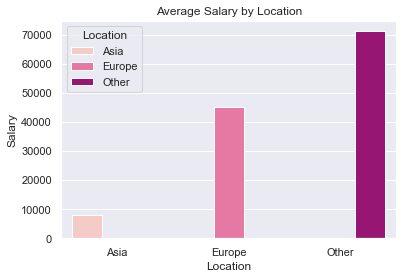

In [408]:

plot_salary = salary.groupby(['Location'])['Salary'].median().reset_index()
sns.barplot(x = 'Location', y = 'Salary', data = plot_salary, hue = 'Location', palette = 'RdPu')
plt.title('Average Salary by Location');
plt.show()

#### Average Salary Based on Location and Education

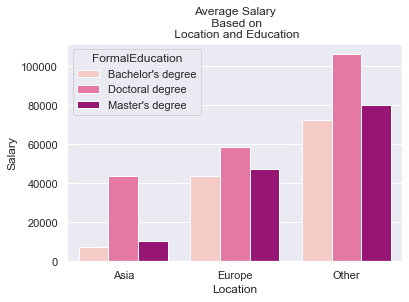

In [409]:
combine = salary.copy()
combine = combine[combine['FormalEducation'].isin(["Bachelor's degree","Master's degree",'Doctoral degree'])]       
combine_plot = combine.groupby(['Location','FormalEducation'])['Salary'].median().reset_index()
sns.barplot(x = 'Location', y = 'Salary', hue = 'FormalEducation', palette = 'RdPu', data = combine_plot)
plt.title('Average Salary\n Based on\n Location and Education');

#### Salary growth of Asian and European respect to their job experience and location

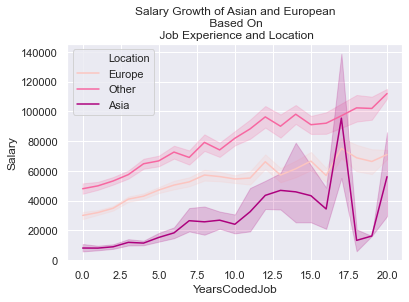

In [410]:
data.groupby(['Location','YearsCodedJob'])['Salary'].median().reset_index()
sns.lineplot(x = 'YearsCodedJob', y = 'Salary', data = data, hue = 'Location', palette = 'RdPu')
plt.title('Salary Growth of Asian and European\n Based On\n Job Experience and Location');

### Conclusion

* From the bar chart, it's showing the actual scenario of the average salary of Asian and European.
  European gets very handsome salary as data scientist. On the other hand for the asian their average salary is much lower then European. 


*  We can differentiate salary range with their Education Status.
   For Doctoral degree, salary range is almost same for Asian and European. But for the Bachelor's or Master's degree graduate's salary range is too much lower for Asian but European gets a good salary.



*  Finally we observed about salary growth of Asian and European respect to their job experience and location.
   It is clear from here salary is increasing with increasing there job experience for European. On the other hand it is little bit different for the Asian. Their salary growth is not proportional with their job experience but sometimes it's become ups and down.
